In [14]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [10]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

In [11]:
# Create a DataFrame with the scaled data
sData = pd.DataFrame(scaled_data)

# Copy the crypto names from the original data
sData.columns = market_data_df.columns

# Set the coinid column as index
sData.index = market_data_df.index

# Display sample data
sData.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [13]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
kVals = range(1, 11)

# Create an empty list to store the inertia values
intertiaVals = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in kVals:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
    
    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(sData)
    
    # 3. Append the model.inertia_ to the inertia list
    intertiaVals.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbowDict = {
    "Number of Clusters (k)": kVals,
    "Inertia": intertiaVals
}

# Create a DataFrame with the data to plot the Elbow curve
elbowData = pd.DataFrame(elbowDict)

# Display the DataFrame
elbowData

,Number of Clusters (k),Inertia
0,1,287.000000
1,2,232.054230
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,61.825846
6,7,48.367731
7,8,39.923519
8,9,36.880504
9,10,29.378710


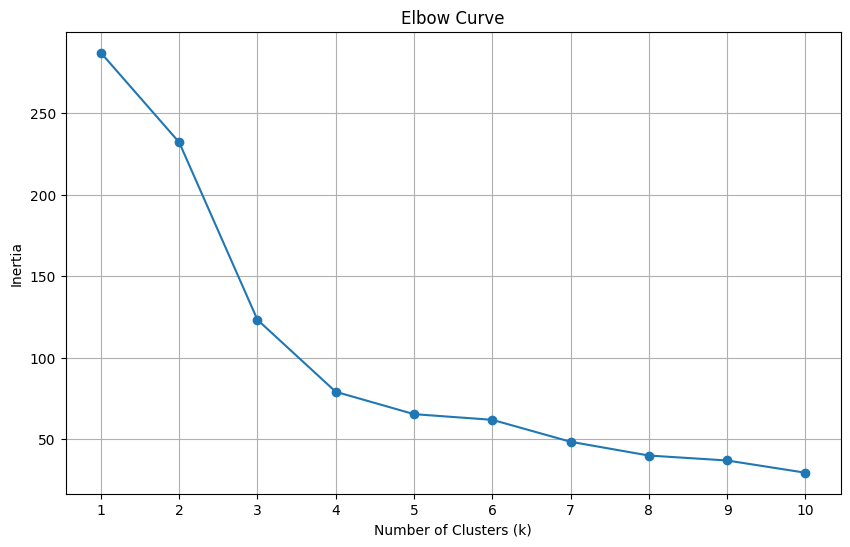

In [15]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbowData['Number of Clusters (k)'], elbowData['Inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbowData['Number of Clusters (k)'])
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [52]:
# Initialize the K-Means model using the best value for k
bestK = 4
kmeans = KMeans(n_clusters=bestK)

In [53]:
# Fit the K-Means model using the scaled data
kmeans.fit(sData)

KMeans(n_clusters=4)

In [54]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(sData)

# View the resulting array of cluster values.
clusters

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 3, 1, 0, 0, 0, 0])

In [55]:
# Create a copy of the DataFrame
copyData = sData.copy()

In [56]:
# Add a new column to the DataFrame with the predicted clusters
copyData["Cluster"] = clusters

# Display sample data
copyData.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


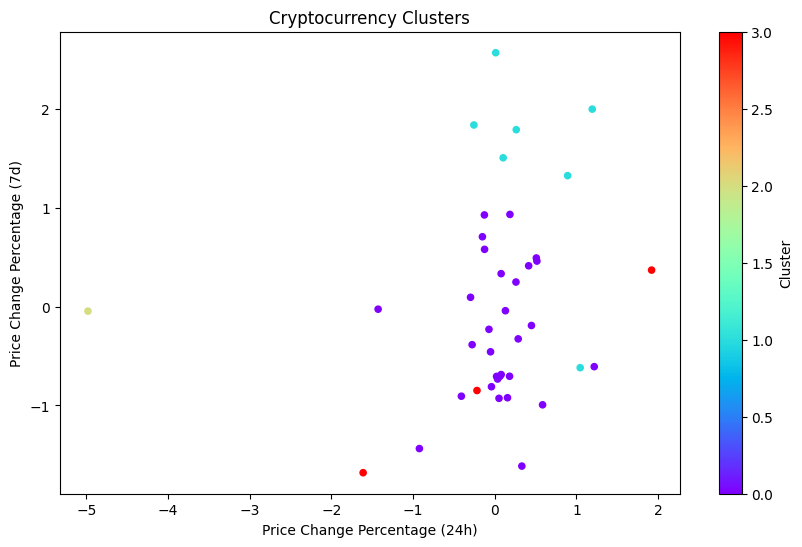

In [57]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
copyData.plot.scatter(x='price_change_percentage_24h', y='price_change_percentage_7d', c='Cluster', cmap='rainbow', figsize=(10, 6))
plt.title('Cryptocurrency Clusters')
plt.xlabel('Price Change Percentage (24h)')
plt.ylabel('Price Change Percentage (7d)')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [89]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [90]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pcaData = pca.fit_transform(sData)

# View the first five rows of the DataFrame. 
pcaData[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [91]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
expVari = pca.explained_variance_ratio_
expVari

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89503166

In [92]:
# Create a new DataFrame with the PCA data.
pcaData2 = pd.DataFrame(pcaData)

# Rename the columns to PC1, 2, 3
pcaData2 = pcaData2.rename(columns={0: "PC1", 1: "PC2", 2: "PC3"})

# Set the coinid column as index
pcaData2.index = sData.index

# Display sample data
pcaData2.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [93]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
kVals = range(1, 11)

# Create an empty list to store the inertia values
intertiaVals = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in kVals:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)
    
    # 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(pcaData)
    
    # 3. Append the model.inertia_ to the inertia list
    intertiaVals.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbowDict = {
    "Number of Clusters (k)": kVals,
    "Inertia": intertiaVals
}

# Create a DataFrame with the data to plot the Elbow curve
elbowData = pd.DataFrame(elbowDict)

# Display the DataFrame
elbowData

,Number of Clusters (k),Inertia
0,1,256.874086
1,2,182.339530
2,3,93.774626
3,4,49.665497
4,5,38.352251
5,6,31.423753
6,7,28.808081
7,8,19.218697
8,9,16.382242
9,10,10.559358


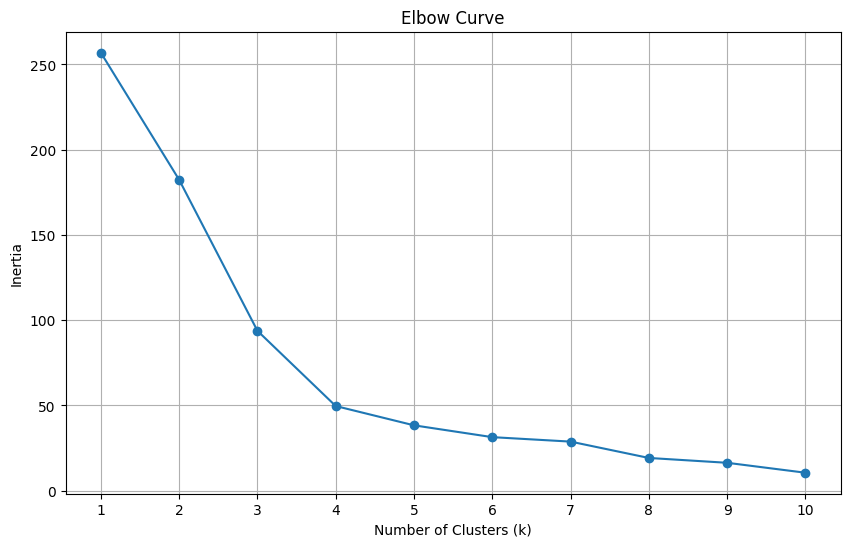

In [94]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbowData['Number of Clusters (k)'], elbowData['Inertia'], marker='o', linestyle='-')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbowData['Number of Clusters (k)'])
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [96]:
# Initialize the K-Means model using the best value for k
bestK = 4
kmeans= KMeans(n_clusters=bestK)

In [97]:
# Fit the K-Means model using the PCA data
kmeans.fit(pcaData)

KMeans(n_clusters=4)

In [98]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.predict(pcaData)

# Print the resulting array of cluster values.
clusters

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 3, 1, 1, 1, 1])

In [102]:
# Create a copy of the DataFrame with the PCA data
copyData = pcaData2

# Add a new column to the DataFrame with the predicted clusters
copyData["crypto_cluster"] = clusters

# Display sample data
copyData.head()

,PC1,PC2,PC3,crypto_cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,1
ripple,-0.471835,-0.222660,-0.479053,1
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [103]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas
scatter_plot = copyData.hvplot.scatter(x='PC1', y='PC2')

scatter_plot

:Scatter   [PC1]   (PC2)

### Determine the Weights of Each Feature on each Principal Component

In [111]:
# Use the columns from the original scaled DataFrame as the index.
weightsData = pd.DataFrame(pca.components_, columns=sData.columns)
weightsData.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
1,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
2,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**
1. `price_change_percentage_200d`
2. `price_change_percentage_30d`
3. `price_change_percentage_7d`
    